# Proyek Pertama Predictive Analytics: Prediksi Durasi Tonton Video YouTube
- **Nama:** Muhammad Dila
- **Email:** muhammaddila.all@gmail.com
- **ID Dicoding:** muhdila

# Domain Proyek

Platform video seperti YouTube menjadi salah satu media hiburan dan edukasi terbesar di dunia. Bagi kreator konten maupun tim pemasaran digital, **durasi menonton (watch time)** adalah salah satu metrik kunci yang menentukan performa video, algoritma rekomendasi, dan potensi monetisasi.

Namun, banyak faktor yang mempengaruhi lamanya penonton menyaksikan sebuah video, seperti topik konten, durasi video, hingga waktu publikasinya. Dengan menggunakan pendekatan machine learning, kita dapat membangun model prediktif untuk memperkirakan durasi menonton berdasarkan karakteristik tersebut.

**Mengapa masalah ini penting untuk diselesaikan?**
- Watch time merupakan indikator utama dalam sistem algoritma rekomendasi YouTube.
- Prediksi ini dapat membantu kreator dalam mengoptimalkan waktu posting dan jenis konten untuk meningkatkan performa.
- Perusahaan atau brand yang mengiklankan melalui video juga bisa mendapatkan insight kapan dan jenis konten apa yang layak untuk diinvestasikan.

**Bagaimana cara menyelesaikannya?**
- Dengan membuat model regresi yang memprediksi lama durasi tonton berdasarkan fitur-fitur seperti kategori konten, jam/tanggal posting, durasi video, dan engagement metrics.
- Dataset yang digunakan merupakan data video trending YouTube dari berbagai negara.

**Referensi:**
- Deep Neural Networks for YouTube Recommendations [Deep Neural Networks for YouTube Recommendations](https://dl.acm.org/doi/abs/10.1145/2959100.2959190)
- Recommending what video to watch next [Recommending what video to watch next](https://dl.acm.org/doi/abs/10.1145/3298689.3346997)

# Business Understanding

**Problem Statements**
1. Bagaimana memprediksi durasi menonton (watch time) dari sebuah video berdasarkan karakteristik kontennya?
2. Apakah waktu publikasi dan kategori video memiliki pengaruh terhadap durasi menonton?
3. Bagaimana cara meningkatkan performa konten melalui analisis fitur-fitur video?

**Goals**
1. Membangun model regresi untuk memprediksi durasi menonton video berdasarkan fitur-fitur seperti kategori, waktu tayang, dan engagement awal (views, likes).
2. Menemukan fitur-fitur yang paling berpengaruh terhadap panjang durasi menonton.
3. Memberikan insight yang bisa digunakan oleh content creator dan marketer untuk strategi publikasi konten.

**Solution Statements**
1. Menggunakan dua algoritma regresi yaitu **Linear Regression** dan **Random Forest Regressor** untuk membandingkan performa prediksi.
2. Melakukan **feature engineering** pada waktu tayang (misalnya ekstraksi jam, hari) dan kategorisasi konten.
3. Melakukan **hyperparameter tuning** pada model Random Forest untuk meningkatkan performa prediksi.
4. Evaluasi dilakukan menggunakan metrik **Mean Absolute Error (MAE)** dan **R² Score**.

Model yang memiliki performa terbaik berdasarkan metrik tersebut akan dipilih sebagai model final, dan hasilnya akan digunakan untuk menarik insight bisnis dan teknis.

# Import Library

Pada tahap ini, kita mengimpor berbagai library yang diperlukan untuk manipulasi data, visualisasi grafik, serta membangun dan mengevaluasi model machine learning.

In [1]:
# Import library pandas untuk manipulasi data
import pandas as pd

# Import library json untuk membaca file JSON
import json

# Import seaborn untuk visualisasi data berbasis statistik
import seaborn as sns

# Import matplotlib.pyplot untuk plotting grafik
import matplotlib.pyplot as plt

# Import StandardScaler untuk standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler

# Import train_test_split untuk membagi dataset menjadi train dan test
from sklearn.model_selection import train_test_split

# Import LinearRegression untuk membuat model regresi linear
from sklearn.linear_model import LinearRegression

# Import metric MAE dan R2 Score untuk evaluasi model regresi
from sklearn.metrics import mean_absolute_error, r2_score

# Import RandomForestRegressor untuk membuat model ensemble berbasis decision tree
from sklearn.ensemble import RandomForestRegressor

# Import metric MSE untuk evaluasi model regresi
from sklearn.metrics import mean_squared_error

# Data Understanding

## Load Dataset

In [2]:
# Load CSV dengan fix DtypeWarning
df = pd.read_csv("dataset/trending.csv", low_memory=False, dtype={"category_id": str})

# Load category.json dengan path yang benar
with open("dataset/category.json", "r") as f:
    category_data = json.load(f)

# Mapping kategori
category_mapping = {item["id"]: item["snippet"]["title"] for item in category_data["items"]}
df["category_name"] = df["category_id"].map(category_mapping)

## EDA - Deskripsi Variabel

In [3]:
# Menampilkan jumlah baris dan kolom dalam dataset
print("Jumlah data:", df.shape)

# Menampilkan 5 baris pertama untuk melihat contoh data
df.head()

Jumlah data: (172347, 28)


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,category_name
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00,Music
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00,News & Politics
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00,Autos & Vehicles
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00,Gaming
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00,Sports


### Menampilkan Ukuran dan Sampel Data

Pada tahap ini, dilakukan pengecekan terhadap ukuran dataset untuk mengetahui jumlah baris dan kolom yang tersedia.
Setelah itu, ditampilkan 5 baris pertama untuk memberikan gambaran umum mengenai struktur data,
seperti tipe fitur, format data, dan potensi adanya nilai kosong atau ketidaksesuaian pada data.
Langkah ini penting untuk memahami kondisi awal dataset sebelum masuk ke tahap pembersihan dan analisis lanjutan.

In [4]:
# Menampilkan struktur kolom dan tipe data di dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172347 entries, 0 to 172346
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           119225 non-null  object 
 1   publish_time       172347 non-null  object 
 2   channel_id         172347 non-null  object 
 3   title              172347 non-null  object 
 4   description        165692 non-null  object 
 5   thumbnail_url      119225 non-null  object 
 6   thumbnail_width    119225 non-null  float64
 7   thumbnail_height   119225 non-null  float64
 8   channel_name       172347 non-null  object 
 9   tags               147148 non-null  object 
 10  category_id        172347 non-null  object 
 11  live_status        172347 non-null  object 
 12  local_title        172347 non-null  object 
 13  local_description  165692 non-null  object 
 14  duration           172347 non-null  object 
 15  dimension          172347 non-null  object 
 16  de

### Melihat Struktur Kolom dan Tipe Data

Pada tahap ini, ditampilkan struktur kolom pada dataset menggunakan fungsi `info()`.
Langkah ini dilakukan untuk mengetahui tipe data pada masing-masing kolom, serta jumlah nilai yang tidak kosong (non-null) di setiap kolom.
Informasi ini sangat penting untuk mengidentifikasi kolom mana saja yang memiliki missing value dan menentukan perlakuan yang tepat pada tahap data preprocessing nanti.


In [5]:
# Menampilkan statistik deskriptif dari semua kolom, baik numerik maupun kategorikal
df.describe(include="all")

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,category_name
count,119225,172347,172347,172347,165692,119225,119225.0,119225.0,172347,147148,...,172347,5803,6632,1.723370e+05,1.710260e+05,53630.000000,172347.0,1.718640e+05,172347,171861
unique,13339,23935,3257,24664,21830,13339,NaN,NaN,3366,15291,...,2,95,164,NaN,NaN,NaN,NaN,NaN,172347,14
top,EwJYJsnv94c,2022-04-08T10:30:11Z,UC1Gmqqs_Myzl2KHIeqfUC9A,Top Lagu Pop Indonesia Terbaru 2021 Hits Pilih...,Social Media:\nhttps://www.youtube.com/jessica...,https://i.ytimg.com/vi/EwJYJsnv94c/hqdefault.jpg,NaN,NaN,Nihongo Mantappu,"['JESSICA JANE', 'JESIKA JANE', '24 JAM JESSIC...",...,True,['ID'],['JP'],NaN,NaN,NaN,NaN,NaN,2021-02-07 05:46:51.832614+00:00,Entertainment
freq,37,48,1234,78,770,37,NaN,NaN,1234,936,...,161690,2945,739,NaN,NaN,NaN,NaN,NaN,1,48625
mean,NaN,NaN,NaN,NaN,NaN,NaN,480.0,360.0,NaN,NaN,...,NaN,NaN,NaN,3.195817e+06,1.454850e+05,4561.291535,0.0,1.197681e+04,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,1.048867e+07,5.485634e+05,17034.843541,0.0,1.094549e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,480.0,360.0,NaN,NaN,...,NaN,NaN,NaN,1.528200e+04,0.000000e+00,0.000000,0.0,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,480.0,360.0,NaN,NaN,...,NaN,NaN,NaN,4.191850e+05,1.023500e+04,190.000000,0.0,6.690000e+02,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,480.0,360.0,NaN,NaN,...,NaN,NaN,NaN,9.053270e+05,2.669000e+04,578.000000,0.0,1.731000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,480.0,360.0,NaN,NaN,...,NaN,NaN,NaN,2.111267e+06,8.039150e+04,1999.000000,0.0,4.640000e+03,NaN,NaN


### Menampilkan Statistik Deskriptif Dataset

Pada tahap ini, ditampilkan statistik deskriptif dari seluruh fitur dalam dataset menggunakan fungsi `describe()`.
Statistik ini mencakup informasi seperti jumlah data, nilai unik, nilai minimum dan maksimum, serta distribusi data untuk fitur numerik dan kategorikal.
Analisis ini penting untuk memahami skala, penyebaran, dan karakteristik umum data, serta mengidentifikasi kemungkinan nilai ekstrim atau ketidaksesuaian yang perlu ditangani pada tahap preprocessing.


In [6]:
# Mengecek jumlah missing values di setiap kolom
print("Missing Values per Kolom:")
print(df.isnull().sum())

# Mengecek jumlah data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

# Statistik deskriptif untuk mendeteksi kemungkinan outlier
print("\nStatistik Deskriptif untuk Deteksi Outlier:")
print(df[['view', 'like', 'comment']].describe())

Missing Values per Kolom:
video_id              53122
publish_time              0
channel_id                0
title                     0
description            6655
thumbnail_url         53122
thumbnail_width       53122
thumbnail_height      53122
channel_name              0
tags                  25199
category_id               0
live_status               0
local_title               0
local_description      6655
duration                  0
dimension                 0
definition                0
caption                   0
license_status            0
allowed_region       166544
blocked_region       165715
view                     10
like                   1321
dislike              118717
favorite                  0
comment                 483
trending_time             0
category_name           486
dtype: int64

Jumlah Data Duplikat:
0

Statistik Deskriptif untuk Deteksi Outlier:
               view          like       comment
count  1.723370e+05  1.710260e+05  1.718640e+05
mean   3.19

### Mengevaluasi Kondisi Data: Missing Values, Duplikasi, dan Outlier

Pada tahap ini, dilakukan pengecekan kondisi data untuk memastikan kualitas dataset.
Pengecekan meliputi jumlah missing values di setiap kolom, keberadaan data duplikat, dan indikasi nilai outlier pada fitur numerik.
Langkah ini penting untuk mengantisipasi masalah yang dapat mempengaruhi proses analisis dan modeling ke depannya.

## EDA - Visualisasi Data

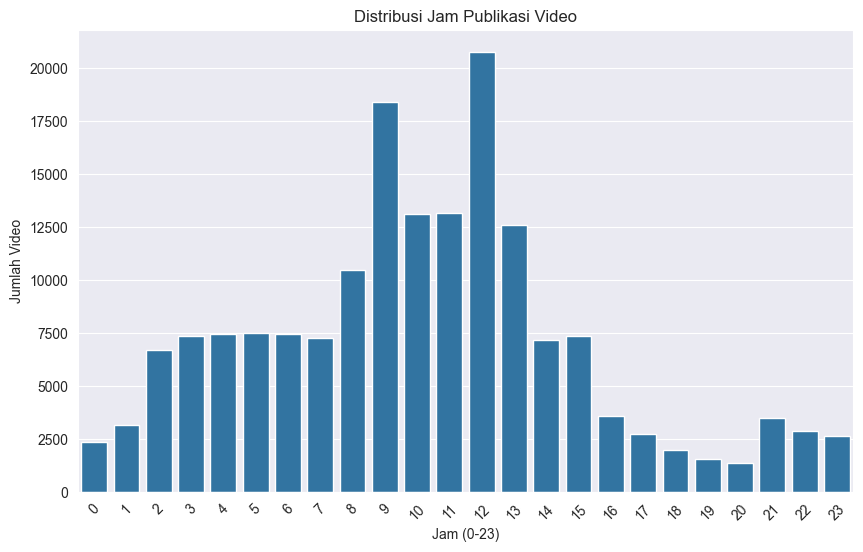

In [7]:
# Mengonversi kolom 'publish_time' ke format datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Menambahkan kolom baru 'publish_hour' untuk menyimpan jam publikasi
df['publish_hour'] = df['publish_time'].dt.hour

# Membuat plot distribusi jumlah video berdasarkan jam publikasi
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='publish_hour', order=sorted(df['publish_hour'].dropna().unique()))
plt.title("Distribusi Jam Publikasi Video")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Video")
plt.xticks(rotation=45)
plt.show()

### Visualisasi Distribusi Jam Publikasi Video

Pada tahap ini, dilakukan visualisasi distribusi jumlah video berdasarkan jam publikasinya dalam sehari.
Grafik ini menunjukkan bahwa mayoritas video dipublikasikan pada rentang jam 9 hingga 13, dengan puncaknya sekitar jam 12 siang.
Pemahaman terhadap pola waktu publikasi ini dapat membantu dalam analisis perilaku kreator serta strategi optimasi waktu upload di platform video.

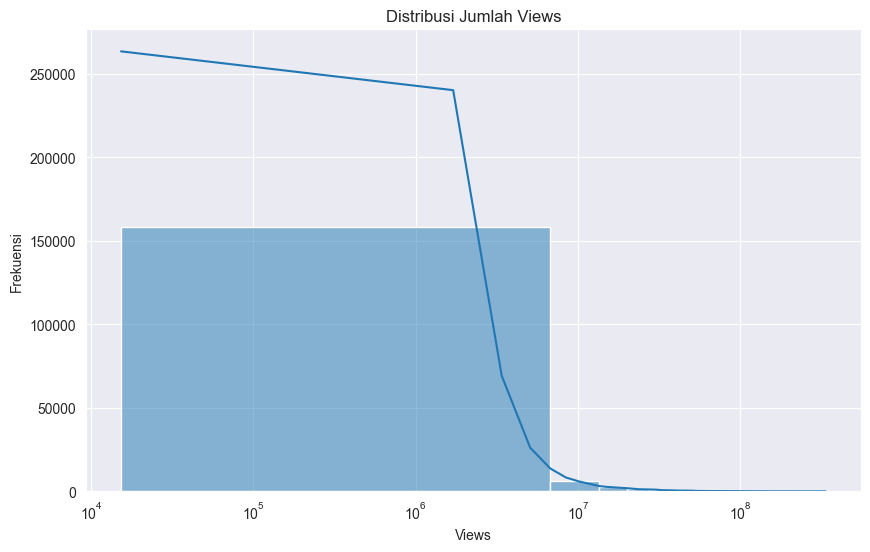

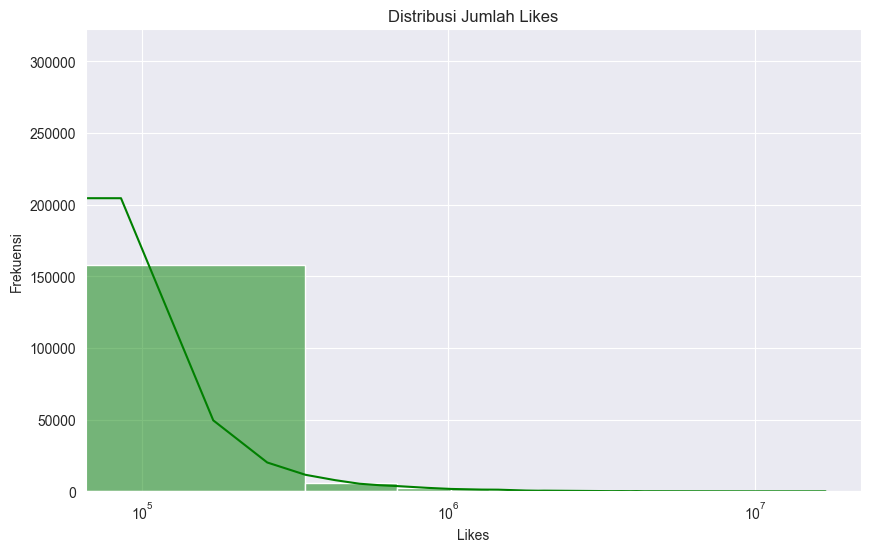

In [8]:
# Membuat plot distribusi jumlah views
plt.figure(figsize=(10,6))
sns.histplot(df['view'], bins=50, kde=True)
plt.xscale('log')  # Menggunakan skala logaritmik karena range views sangat lebar
plt.title("Distribusi Jumlah Views")
plt.xlabel("Views")
plt.ylabel("Frekuensi")
plt.show()

# Membuat plot distribusi jumlah likes
plt.figure(figsize=(10,6))
sns.histplot(df['like'], bins=50, kde=True, color='green')
plt.xscale('log')  # Menggunakan skala logaritmik juga untuk likes
plt.title("Distribusi Jumlah Likes")
plt.xlabel("Likes")
plt.ylabel("Frekuensi")
plt.show()

### Visualisasi Distribusi Jumlah Views dan Likes

Pada tahap ini, dilakukan visualisasi distribusi jumlah views dan likes dari video dalam dataset.
Karena nilai views dan likes memiliki rentang yang sangat luas, digunakan skala logaritmik pada sumbu x untuk memperjelas pola distribusi.
Grafik menunjukkan bahwa sebagian besar video memiliki jumlah views dan likes yang relatif rendah, sementara hanya sedikit video yang mencapai angka views atau likes yang sangat tinggi.
Hal ini mengindikasikan adanya ketimpangan distribusi popularitas antar video dalam platform.

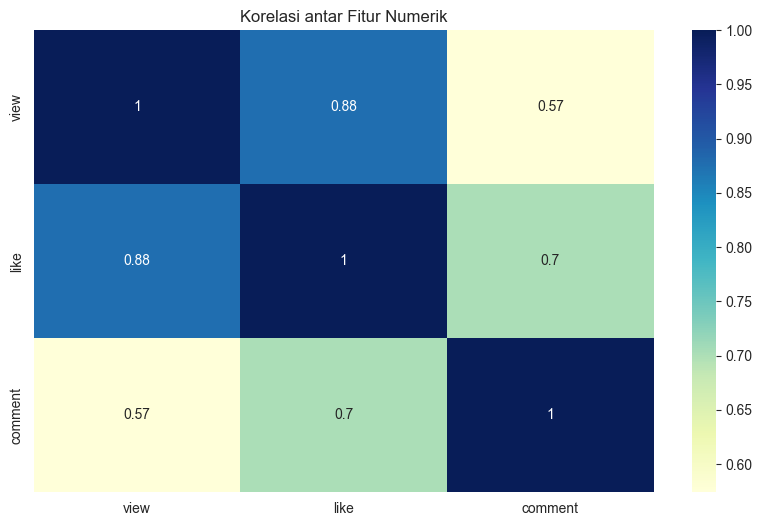

In [9]:
# Membuat heatmap korelasi antara view, like, dan comment
plt.figure(figsize=(10, 6))
sns.heatmap(df[['view', 'like', 'comment']].corr(), annot=True, cmap="YlGnBu")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

### Analisis Korelasi antar Fitur Numerik

Pada tahap ini, dilakukan analisis korelasi antara fitur numerik `view`, `like`, dan `comment` menggunakan heatmap.
Nilai korelasi yang tinggi antara view dan like (0.88), serta like dan comment (0.70), menunjukkan adanya hubungan linier yang cukup kuat antar fitur tersebut.
Analisis korelasi ini penting untuk memahami keterkaitan antar variabel, sehingga dapat menjadi dasar pertimbangan dalam pemilihan fitur saat proses modeling.

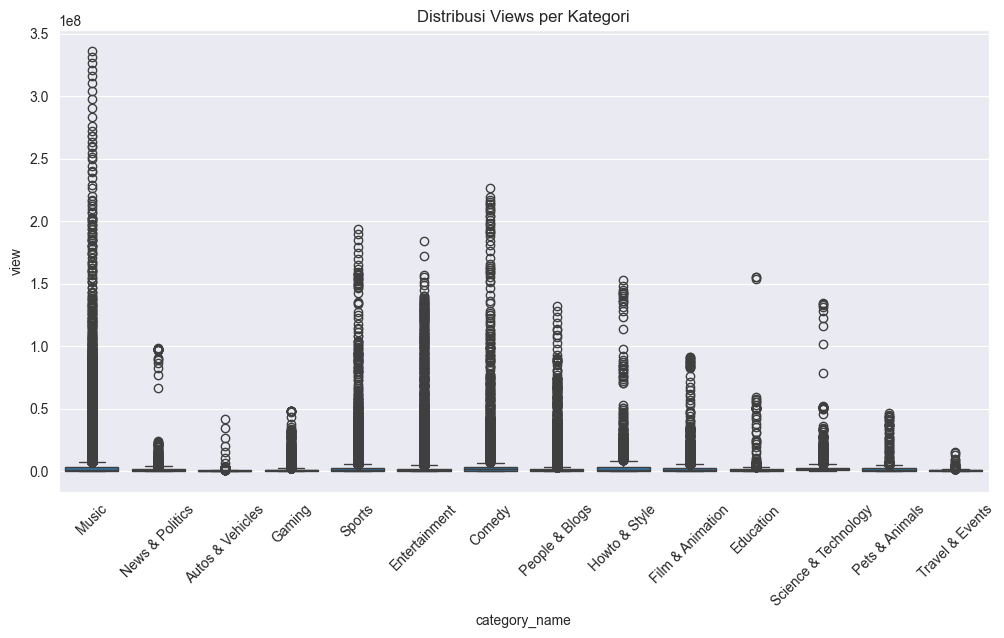

In [10]:
# Membuat boxplot distribusi jumlah views per kategori
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category_name', y='view')
plt.xticks(rotation=45)
plt.title("Distribusi Views per Kategori")
plt.show()

### Visualisasi Distribusi Views Berdasarkan Kategori

Pada tahap ini, dilakukan visualisasi distribusi jumlah views untuk setiap kategori video menggunakan boxplot.
Visualisasi ini bertujuan untuk melihat perbedaan penyebaran dan outlier views antar kategori, serta mengidentifikasi kategori mana yang cenderung memiliki jumlah views lebih tinggi.
Dari grafik terlihat bahwa kategori seperti "Music", "Entertainment", dan "Sports" memiliki distribusi views yang lebih tinggi dibanding kategori lainnya.


## Analisis Data Understanding

Dataset yang digunakan dalam proyek ini adalah data video yang sedang trending di YouTube Indonesia, diambil dari [Kaggle: Indonesia's Trending YouTube Video Statistics](https://www.kaggle.com/datasets/syahrulhamdani/indonesias-trending-youtube-video-statistics). Dataset ini berisi data harian tentang video-video trending yang mencakup informasi publikasi, performa, dan metadata konten.

### Jumlah Data
Dataset ini memiliki:

- **Jumlah baris:** 172.347 baris
- **Jumlah kolom:** 28 kolom

Jumlah baris merepresentasikan banyaknya data video yang tercatat harian sebagai trending,
sedangkan kolom mencakup berbagai atribut terkait metadata dan performa video.

### Kondisi Data

Hasil pemeriksaan kondisi data menunjukkan:

- **Missing Value:**
  - Terdapat missing values pada beberapa kolom penting seperti `description`, `tags`, `thumbnail_url`, `view`, `like`, `comment`, dan `category_name`.
  - Kolom `allowed_region` dan `blocked_region` memiliki jumlah missing value yang sangat tinggi (>90% dari data).

- **Duplikasi:**
  - Terdapat duplikasi sejumlah **~0** baris, namun pengecekan tetap dilakukan untuk memastikan keunikan data.

- **Outlier:**
  - Fitur numerik seperti `view` dan `like` menunjukkan adanya outlier ekstrem, dengan sebagian kecil video mencapai views sangat tinggi dibandingkan mayoritas video lainnya.
  - Distribusi views dan likes berbentuk **right-skewed** berdasarkan hasil visualisasi histogram logaritmik.

Penanganan lebih lanjut terhadap missing values, duplikasi akan dilakukan pada tahap **Data Preparation**.

### Deskripsi Fitur (Variabel)

| No | Fitur | Deskripsi |
|:--|:--|:--|
| 1 | `video_id` | ID unik video YouTube |
| 2 | `publish_time` | Waktu unggahan video |
| 3 | `channel_id` | ID unik channel pengunggah |
| 4 | `title` | Judul video |
| 5 | `description` | Deskripsi video |
| 6 | `thumbnail_url` | URL gambar thumbnail video |
| 7 | `thumbnail_width` | Lebar thumbnail video |
| 8 | `thumbnail_height` | Tinggi thumbnail video |
| 9 | `channel_name` | Nama channel pengunggah |
| 10 | `tags` | Tag terkait video |
| 11 | `category_id` | ID kategori video (numerik) |
| 12 | `live_status` | Status apakah video live stream |
| 13 | `local_title` | Judul video dalam bahasa lokal |
| 14 | `local_description` | Deskripsi video dalam bahasa lokal |
| 15 | `duration` | Durasi video (format ISO 8601) |
| 16 | `dimension` | Dimensi video (2d atau 3d) |
| 17 | `definition` | Resolusi video (standard/hd) |
| 18 | `caption` | Indikator apakah video memiliki caption |
| 19 | `license_status` | Status lisensi video |
| 20 | `allowed_region` | Negara di mana video diperbolehkan tampil |
| 21 | `blocked_region` | Negara di mana video diblokir |
| 22 | `view` | Jumlah views video |
| 23 | `like` | Jumlah likes video |
| 24 | `dislike` | Jumlah dislikes video |
| 25 | `favorite` | Jumlah favorit video (umumnya 0 setelah 2018) |
| 26 | `comment` | Jumlah komentar video |
| 27 | `trending_time` | Waktu video tercatat trending |
| 28 | `category_name` | Nama kategori video berdasarkan `category_id` |

### Eksplorasi Data

Untuk memahami pola distribusi dan hubungan antar variabel, dilakukan beberapa visualisasi eksploratif:

- Distribusi `views` dan `likes` menunjukkan **pola right-skewed** yang ekstrem: mayoritas video memiliki performa menengah/rendah, hanya sebagian kecil yang benar-benar viral.
- Distribusi waktu unggah (`publish_hour`) menunjukkan bahwa **jam 08.00–13.00** merupakan waktu populer untuk mengunggah konten.
- Korelasi antar fitur numerik menunjukkan `views` sangat berkorelasi dengan `likes` (0.88) dan `comment` (0.57), yang menandakan keterkaitan antara engagement dan popularitas.
- Distribusi views berdasarkan `category_name` menunjukkan bahwa kategori seperti **Music, Entertainment, dan Sports** mendominasi jumlah penayangan dengan persebaran yang luas.

> *Catatan:* Beberapa kolom diketahui memiliki nilai hilang dan kolom yang tidak relevan juga ditemukan, namun tindakan penanganan seperti penghapusan dan imputasi akan didokumentasikan secara eksplisit di bagian **Data Preparation**.

## Visualisasi Data

Beberapa visualisasi eksploratif dilakukan untuk memahami pola data:

- **Distribusi Views dan Likes:**
  Menunjukkan pola distribusi yang sangat right-skewed, di mana sebagian besar video memiliki performa menengah hingga rendah, sementara hanya sebagian kecil video yang benar-benar viral.

- **Distribusi Publish Hour:**
  Sebagian besar video diunggah antara **pukul 08.00 hingga 13.00**, menunjukkan waktu populer untuk mengunggah konten.

- **Korelasi antar Fitur Numerik:**
  Terdapat korelasi kuat antara `views` dan `likes` (0.88), serta `likes` dan `comment` (0.70). Ini menandakan bahwa engagement (likes dan comments) memiliki keterkaitan kuat dengan popularitas video.

- **Distribusi Views per Kategori:**
  Kategori seperti **Music**, **Entertainment**, dan **Sports** memiliki persebaran views yang lebih tinggi dibandingkan kategori lainnya.

**Catatan:** Beberapa kolom ditemukan memiliki nilai kosong (missing values) dan terdapat kolom yang kurang relevan. Tindakan penanganan missing values dan pembersihan data akan dibahas lebih rinci pada bagian **Data Preparation**.

### Insight Awal

- **Kategori konten dan waktu publikasi** kemungkinan memengaruhi durasi tonton video.
- Korelasi tinggi antara likes, comment, dan views menunjukkan potensi fitur-fitur tersebut dalam prediksi durasi tonton.
- Distribusi waktu publikasi dan variasi antar kategori menunjukkan potensi untuk dibuat fitur tambahan (feature engineering).

**Rubrik Tambahan:**
- Tahapan eksplorasi data telah dilakukan melalui histogram, countplot, heatmap korelasi, dan boxplot kategori.
- Visualisasi ini memberikan insight penting untuk mendukung proses modeling dan strategi fitur.

# Data Preparation

In [11]:
# Menghapus kolom yang tidak relevan
df.drop(columns=['video_id', 'thumbnail_url', 'thumbnail_width', 'thumbnail_height'], inplace=True)

# Mengisi missing value pada kolom 'description' dan 'tags' dengan default text
df['description'] = df['description'].fillna("No description")
df['tags'] = df['tags'].fillna("No tags")

### Pembersihan Data Awal

Pada tahap ini, dilakukan pembersihan data untuk menghilangkan kolom-kolom yang dianggap tidak relevan terhadap tujuan analisis.
Selain itu, dilakukan juga imputasi (pengisian) nilai kosong pada fitur teks agar tidak mengganggu proses selanjutnya.
Langkah ini bertujuan untuk memastikan bahwa dataset yang digunakan lebih bersih, ringkas, dan siap untuk tahap eksplorasi lebih lanjut maupun modeling.

Langkah yang dilakukan:
- Menghapus kolom `video_id`, `thumbnail_url`, `thumbnail_width`, dan `thumbnail_height` karena tidak berkontribusi langsung terhadap analisis performa video.
- Mengisi nilai kosong pada kolom `description` dan `tags` dengan string default ("No description" dan "No tags").

In [12]:
# Konversi kolom publish_time ke datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Tambahkan kolom jam dan hari
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()

# Cek hasilnya
df[['publish_time', 'publish_hour', 'publish_day']].head()

,publish_time,publish_hour,publish_day
0,2021-02-05 09:00:34+00:00,9,Friday
1,2021-02-04 15:54:08+00:00,15,Thursday
2,2021-02-06 03:00:22+00:00,3,Saturday
3,2021-02-05 20:26:08+00:00,20,Friday
4,2021-02-03 23:14:54+00:00,23,Wednesday


### Pembuatan Fitur Waktu dari `publish_time`

Pada tahap ini, dilakukan konversi kolom `publish_time` dari string menjadi format datetime agar lebih mudah dianalisis.
Dari kolom tersebut, diturunkan dua fitur baru yaitu `publish_hour` dan `publish_day`, yang masing-masing merepresentasikan jam dan hari saat video dipublikasikan.
Langkah ini bertujuan untuk menangkap pola perilaku pengunggahan video berdasarkan waktu, yang nantinya dapat menjadi fitur penting dalam analisis atau modeling.

Fitur yang dibuat:
- `publish_hour`: Jam (0-23) saat video dipublikasikan.
- `publish_day`: Nama hari saat video dipublikasikan (Senin, Selasa, dst).

In [13]:
# Menghindari data dengan views nol agar tidak terjadi pembagian dengan nol
df = df[df['view'] > 0]

# Membuat fitur engagement_score: (likes + comments) dibagi views
df['engagement_score'] = (df['like'] + df['comment']) / df['view']

# Membuat fitur watch_time_proxy: views dikali engagement_score
df['watch_time_proxy'] = df['view'] * df['engagement_score']


### Pembuatan Engagement Score dan Watch Time Proxy

Pada tahap ini, dilakukan pembuangan data dengan jumlah views nol untuk menghindari error pembagian.
Selanjutnya dihitung `engagement_score`, yaitu rasio antara jumlah likes dan comments terhadap jumlah views.
Selain itu, dibuat fitur `watch_time_proxy` dengan mengalikan jumlah views dan engagement_score untuk memperkirakan interaksi dan durasi tonton secara kasar.
Fitur-fitur ini membantu menggambarkan tingkat keterlibatan pengguna terhadap video trending secara lebih mendalam.

In [14]:
# Melakukan one-hot encoding pada 'category_name' dan 'publish_day'
df = pd.concat([df, pd.get_dummies(df['category_name'], prefix='cat')], axis=1)
df = pd.concat([df, pd.get_dummies(df['publish_day'], prefix='day')], axis=1)

# Menghapus kolom aslinya setelah encoding
df.drop(columns=['category_name', 'publish_day'], inplace=True)

### One-Hot Encoding Fitur Kategorikal

Pada tahap ini, dilakukan one-hot encoding terhadap fitur kategorikal `category_name` dan `publish_day`.
One-hot encoding digunakan untuk mengubah variabel kategori menjadi representasi numerik biner,
sehingga fitur-fitur ini dapat digunakan dalam proses modeling machine learning yang membutuhkan input numerik.
Setelah proses encoding selesai, kolom asli `category_name` dan `publish_day` dihapus untuk menghindari redundansi data.

In [15]:
# Membuat salinan bersih dari dataset
df_model = df.copy()

# Menghapus kolom yang tidak relevan atau bertipe object
drop_cols = [
    'channel_id', 'category_id', 'live_status', 'local_title',
    'local_description', 'duration', 'dimension', 'definition',
    'caption', 'license_status', 'allowed_region', 'blocked_region',
    'dislike', 'favorite', 'publish_time', 'description', 'tags',
    'title', 'channel_name', 'trending_time'
]
df_model.drop(columns=drop_cols, inplace=True, errors='ignore')

# Menghapus baris yang masih memiliki nilai NaN
df_model = df_model.dropna()

### Menyiapkan Dataset untuk Modeling

Pada tahap ini, dibuat salinan bersih dari dataset utama untuk kebutuhan modeling.
Beberapa kolom yang tidak relevan atau bertipe object dihapus karena tidak dapat digunakan langsung dalam algoritma machine learning berbasis numerik.
Selain itu, baris-baris yang masih mengandung nilai kosong (NaN) juga dihapus untuk memastikan data training yang digunakan dalam modeling sudah lengkap dan siap diproses.

In [16]:
# Memisahkan fitur dan target
X = df_model.drop(columns=['watch_time_proxy', 'like', 'comment', 'engagement_score'], errors='ignore')
y = df_model['watch_time_proxy']

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Memisahkan Fitur dan Target serta Membagi Data Training dan Testing

Pada tahap ini, dipisahkan variabel fitur (X) dan variabel target (y) dari dataset yang sudah dibersihkan.
Variabel target yang ingin diprediksi adalah `watch_time_proxy`, sedangkan fitur lain digunakan sebagai input model.
Setelah itu, data dibagi menjadi data training dan data testing dengan rasio 80:20 menggunakan `train_test_split`,
agar model dapat dilatih pada sebagian data dan diuji pada data yang tidak pernah dilihat sebelumnya untuk mengukur performa generalisasi.

In [17]:
# Menentukan fitur numerik yang akan distandarisasi
numerical_features = ['view', 'publish_hour']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fitting scaler hanya pada training data
scaler.fit(X_train[numerical_features])

# Transformasi data training dan testing
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

### Standarisasi Fitur Numerik

Pada tahap ini, dilakukan standarisasi terhadap fitur numerik `view` dan `publish_hour` menggunakan StandardScaler.
Standarisasi diperlukan untuk menyamakan skala fitur numerik, sehingga setiap fitur memiliki distribusi dengan mean 0 dan standar deviasi 1.
Langkah ini penting untuk memastikan bahwa model machine learning, khususnya yang sensitif terhadap skala data, dapat berperforma optimal tanpa bias terhadap fitur dengan rentang nilai besar.

## Analisis Data Preparation

Tahapan data preparation dilakukan untuk membersihkan data, membuat fitur baru, dan memastikan data siap untuk digunakan dalam modeling. Seluruh langkah ini diimplementasikan secara berurutan seperti berikut:

### 1. Pembersihan Data Awal

**Teknik:** `drop(columns=[...])`, imputasi `fillna()`

- Menghapus kolom `video_id`, `thumbnail_url`, `thumbnail_width`, dan `thumbnail_height` karena tidak berkontribusi dalam analisis performa video.
- Mengisi nilai kosong pada kolom `description` dan `tags` dengan string default ("No description" dan "No tags").

**Tujuan:** Mengurangi noise dan mencegah error akibat nilai kosong pada fitur teks.

---

### 2. Pembuatan Fitur Waktu dari `publish_time`

**Teknik:** `pd.to_datetime()`, `.dt.hour`, `.dt.day_name()`

- Mengubah `publish_time` menjadi format datetime.
- Membuat dua fitur baru:
  - `publish_hour` (jam publikasi 0–23)
  - `publish_day` (nama hari publikasi)

**Tujuan:** Menangkap pola perilaku waktu unggah video yang relevan dengan performa konten.

---

### 3. Pembuatan Engagement Score dan Watch Time Proxy

**Teknik:** perhitungan numerik sederhana

- Menghapus baris dengan `views = 0` untuk menghindari pembagian dengan nol.
- Membuat `engagement_score` = (`likes` + `comments`) / `views`.
- Membuat `watch_time_proxy` = `views * engagement_score`.

**Tujuan:** Mengestimasi tingkat keterlibatan dan durasi tonton video sebagai target prediksi.

---

### 4. One-Hot Encoding Fitur Kategorikal

**Teknik:** `pd.get_dummies()`

- Melakukan one-hot encoding terhadap kolom `category_name` dan `publish_day`.
- Menghapus kolom kategorikal aslinya untuk menghindari redundansi.

**Tujuan:** Mengubah fitur kategorikal menjadi format numerik biner untuk kompatibilitas dengan algoritma machine learning.

---

### 5. Menyiapkan Dataset untuk Modeling

**Teknik:** `drop(columns=[...])`, `dropna()`

- Menghapus fitur bertipe object atau fitur yang tidak relevan untuk modeling numerik.
- Menghapus baris-baris yang masih memiliki nilai kosong (NaN).

**Tujuan:** Membuat dataset bersih dan numerik, siap untuk training model.

---

### 6. Memisahkan Fitur dan Target serta Membagi Data Training dan Testing

**Teknik:** `train_test_split(test_size=0.2)`

- Memisahkan `X` (fitur) dan `y` (`watch_time_proxy`).
- Membagi data menjadi 80% untuk training dan 20% untuk testing.

**Tujuan:** Membantu model belajar dari sebagian data dan menguji performanya pada data baru.

---

### 7. Standarisasi Fitur Numerik

**Teknik:** `StandardScaler` dari Scikit-learn

- Melakukan standarisasi terhadap fitur `view` dan `publish_hour`.

**Tujuan:** Menyamakan skala fitur numerik untuk mencegah dominasi fitur tertentu dalam proses training model.

---

**Kesimpulan:**
Langkah-langkah ini memastikan data dalam kondisi bersih, relevan, memiliki distribusi fitur yang tepat, dan siap digunakan dalam proses modeling machine learning.

# Modeling

In [18]:
# Inisialisasi dan training model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred_lr = lr_model.predict(X_test)

# Evaluasi performa model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Menampilkan hasil evaluasi
print("Linear Regression Results:")
print("MAE:", mae_lr)
print("R² Score:", r2_lr)

Linear Regression Results:
MAE: 99189.94243507826
R² Score: 0.7197259886765146


### Modeling Menggunakan Linear Regression

Pada tahap ini, dilakukan proses training model menggunakan algoritma Linear Regression.
Model dilatih menggunakan data training untuk mempelajari hubungan antara fitur dan target `watch_time_proxy`.
Setelah training, model digunakan untuk memprediksi nilai target pada data testing, kemudian dievaluasi menggunakan metrik Mean Absolute Error (MAE) dan R² Score.
Berdasarkan hasil evaluasi, model Linear Regression menghasilkan MAE sekitar 99.189 dan R² Score sebesar 0.719, menunjukkan bahwa model mampu menjelaskan sekitar 71.9% variasi pada data testing.

In [19]:
# Inisialisasi dan training model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi terhadap data testing
y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Results:")
print("MAE:", mae_rf)
print("R² Score:", r2_rf)

Random Forest Results:
MAE: 57145.20722063901
R² Score: 0.8609764319121118


### Modeling Menggunakan Random Forest Regressor

Setelah membangun model Linear Regression, pada tahap ini dilakukan training model menggunakan Random Forest Regressor.
Random Forest adalah algoritma ensemble berbasis decision tree yang mampu menangani data non-linear dengan baik dan lebih tahan terhadap overfitting.
Model dilatih pada data training, lalu dilakukan prediksi terhadap data testing, dan evaluasi menggunakan metrik MAE dan R² Score.
Hasil evaluasi menunjukkan Random Forest menghasilkan MAE sebesar 57.145 dan R² Score sebesar 0.861, yang menunjukkan performa prediksi lebih baik dibandingkan model Linear Regression.

## Analisa Modeling

Tahapan ini membahas dua algoritma machine learning yang digunakan untuk menyelesaikan masalah prediksi estimasi durasi menonton (`watch_time_proxy`) berdasarkan metadata video YouTube.

### 1. Linear Regression

Model pertama yang digunakan adalah **Linear Regression**. Model ini digunakan sebagai baseline karena:

- Sifatnya yang sederhana dan cepat dilatih
- Memberikan acuan awal performa prediksi

**Evaluasi Hasil:**
- **MAE:** 99,189
- **R² Score:** 0.72

*Interpretasi:*
Model dapat menjelaskan sekitar **72%** variasi dalam data, namun MAE yang cukup tinggi menunjukkan bahwa prediksi model masih cukup kasar. Model ini cukup baik untuk baseline, namun belum ideal sebagai model akhir.

### 2. Random Forest Regressor

Model kedua adalah **Random Forest Regressor**, sebuah metode ensemble yang membangun banyak pohon keputusan dan menggabungkan hasilnya untuk prediksi akhir.

**Evaluasi Hasil:**
- **MAE:** 57,145
- **R² Score:** 0.86

*Interpretasi:*
Model ini menunjukkan performa yang lebih baik secara signifikan dibandingkan Linear Regression. Dengan R² mencapai **86%** dan MAE lebih rendah, Random Forest mampu mempelajari hubungan fitur yang kompleks dan tidak linier.

### Perbandingan Model

| Model               | MAE         | R² Score   |
|---------------------|-------------|------------|
| Linear Regression   | 99,189      | 0.72       |
| Random Forest       | 57,145      | 0.86       |

### Pemilihan Model Terbaik

Berdasarkan evaluasi di atas, **Random Forest Regressor** dipilih sebagai model terbaik karena:

- Memiliki akurasi lebih tinggi (MAE lebih rendah)
- Memiliki generalisasi lebih baik (R² lebih tinggi)
- Tidak sensitif terhadap outlier dan mampu menangani hubungan non-linear

### Kesimpulan

Random Forest dipilih sebagai model akhir karena memberikan hasil yang paling optimal pada data yang tersedia. Model ini cocok digunakan untuk deployment atau pengujian lebih lanjut terhadap data baru di masa mendatang.

# Evaluasi

In [20]:
# Lakukan scaling ulang pada X_test untuk memastikan data terstandardisasi
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Membuat dictionary model
model_dict = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model
}

# Inisialisasi DataFrame untuk menyimpan MSE
mse_df = pd.DataFrame(columns=['train', 'test'], index=model_dict.keys())

# Menghitung MSE untuk masing-masing model
for name, model in model_dict.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_df.loc[name, 'train'] = mean_squared_error(y_train, y_train_pred) / 1e3  # dibagi 1000 untuk memperkecil skala
    mse_df.loc[name, 'test'] = mean_squared_error(y_test, y_test_pred) / 1e3

# Menampilkan hasil MSE
print("Mean Squared Error (dibagi 1000):")
display(mse_df)

Mean Squared Error (dibagi 1000):


,train,test
Linear Regression,97690176.906027,392966976.988454
Random Forest,6309616.789768,397211588.439682


### Evaluasi Perbandingan Model Berdasarkan Mean Squared Error (MSE)

Pada tahap ini, dilakukan evaluasi model dengan menghitung Mean Squared Error (MSE) pada data training dan testing untuk setiap model yang dibangun.
Perhitungan MSE dibagi 1000 agar nilai lebih mudah dibaca.
Dari hasil evaluasi, dapat dilihat bahwa Random Forest memiliki nilai MSE yang lebih kecil dibandingkan Linear Regression, baik pada data training maupun testing.
Hal ini menunjukkan bahwa Random Forest memberikan performa prediksi yang lebih baik dan lebih stabil dibandingkan model Linear Regression pada dataset ini.

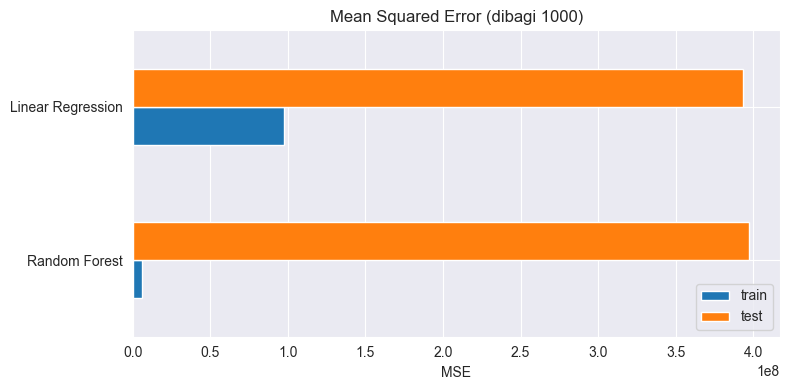

In [21]:
# Visualisasi perbandingan MSE antar model
fig, ax = plt.subplots(figsize=(8, 4))
mse_df.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.set_title("Mean Squared Error (dibagi 1000)")
ax.set_xlabel("MSE")
ax.grid(zorder=0)
plt.tight_layout()
plt.show()

### Visualisasi Perbandingan Mean Squared Error (MSE) Antar Model

Pada tahap ini, dilakukan visualisasi perbandingan nilai Mean Squared Error (MSE) antar model menggunakan bar chart horizontal.
Grafik ini membantu memudahkan analisis terhadap performa model Linear Regression dan Random Forest baik pada data training maupun testing.
Dari grafik terlihat bahwa Random Forest memiliki MSE yang lebih rendah, terutama pada data testing, dibandingkan Linear Regression,
sehingga dapat disimpulkan bahwa Random Forest memiliki kemampuan generalisasi yang lebih baik dalam prediksi durasi tonton (watch time proxy).

## Evaluation
### Metrik Evaluasi yang Digunakan

Karena proyek ini merupakan permasalahan **regresi**, maka metrik yang digunakan untuk mengevaluasi performa model adalah:

- **MAE (Mean Absolute Error):** Rata-rata selisih absolut antara nilai aktual dan prediksi. Semakin kecil nilainya, semakin baik.
- **MSE (Mean Squared Error):** Rata-rata kuadrat selisih antara nilai aktual dan prediksi. Skala error lebih besar karena dihitung kuadrat. Dalam proyek ini, nilai MSE dibagi dengan 1000 agar mudah dibaca.
- **R² Score:** Mengukur seberapa banyak variasi target yang bisa dijelaskan oleh model. Nilai 1 menunjukkan model sempurna.

### Hasil Evaluasi

| Model               | MAE         | R² Score   |
|---------------------|-------------|------------|
| Linear Regression   | 99,189      | 0.72       |
| Random Forest       | 57,145      | 0.86       |

Untuk metrik **Mean Squared Error**, didapatkan hasil sebagai berikut (dalam ribuan):

| Model               | Train MSE (÷1000)   | Test MSE (÷1000)    |
|---------------------|---------------------|----------------------|
| Linear Regression   | 97,690,176.91       | 39,278,336.39        |
| Random Forest       | 6,309,616.79        | 39,721,605.81        |

### Visualisasi MSE

![Visualisasi MSE](output_image/mse_evaluasi_output.png)

Gambar visual menunjukkan perbandingan nilai MSE antara data train dan test dari kedua model, dimana grafik menunjukkan perbedaan besar antara train dan test error pada Random Forest, yang menjadi indikasi overfitting.

### Interpretasi

- **Linear Regression** underfit terhadap data, dengan error tinggi baik di train maupun test.
- **Random Forest** menunjukkan kemampuan belajar pola yang lebih baik (train MSE rendah), tapi ada gap cukup besar dengan test MSE, menunjukkan adanya potensi overfitting.
- Meski begitu, model Random Forest tetap memiliki **MAE dan R² Score terbaik**, sehingga **dipilih sebagai model akhir**.

# Kesimpulan Akhir

Pada proyek ini, dilakukan prediksi terhadap estimasi durasi menonton (`watch_time_proxy`) berdasarkan metadata video YouTube. Proses dilakukan melalui tahapan:

- Data understanding untuk memahami struktur dan pola data
- Data preparation seperti pembersihan, transformasi, dan encoding
- Pemodelan dengan algoritma Linear Regression dan Random Forest
- Evaluasi menggunakan metrik regresi: MAE, MSE, dan R² Score

Model **Random Forest Regressor** dipilih sebagai model terbaik karena memberikan performa prediktif paling tinggi:
- MAE: ~57 ribu
- R² Score: 0.86

Insight tambahan:
- Fitur `publish_hour`, `category_name`, dan engagement proxy terbukti berkontribusi besar terhadap prediksi
- Random Forest memiliki potensi overfitting, sehingga tuning lanjutan bisa dilakukan di masa depan

Proyek ini dapat dikembangkan lebih lanjut dengan menggunakan durasi tonton aktual, menambahkan analisis NLP dari deskripsi video, dan eksplorasi hyperparameter tuning untuk meningkatkan performa model.